In [1]:
import os
os.environ["OPENAI_DEFAULT_MODEL"] = 'gpt-4o-mini'

In [2]:
!pip install yfinance matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.013718,85.971745,81.228301,85.049052,559863000
2024-05-02,85.788811,86.208671,83.172666,84.421256,377898000
2024-05-03,88.759834,89.251669,87.011408,87.760163,398341000
2024-05-06,92.109726,92.189701,89.025740,89.360629,376203000
2024-05-07,90.524246,91.750840,88.981754,91.068066,437342000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.748863,95.168723,93.409307,93.719203,318764000
2024-05-21,95.354668,95.368663,93.149391,93.568252,328946000
2024-05-22,94.918808,95.988456,93.218370,95.427643,548648000
2024-05-23,103.764915,106.285084,101.486657,101.994493,835065000
2024-05-24,106.434036,106.440031,102.966174,104.414695,429494000


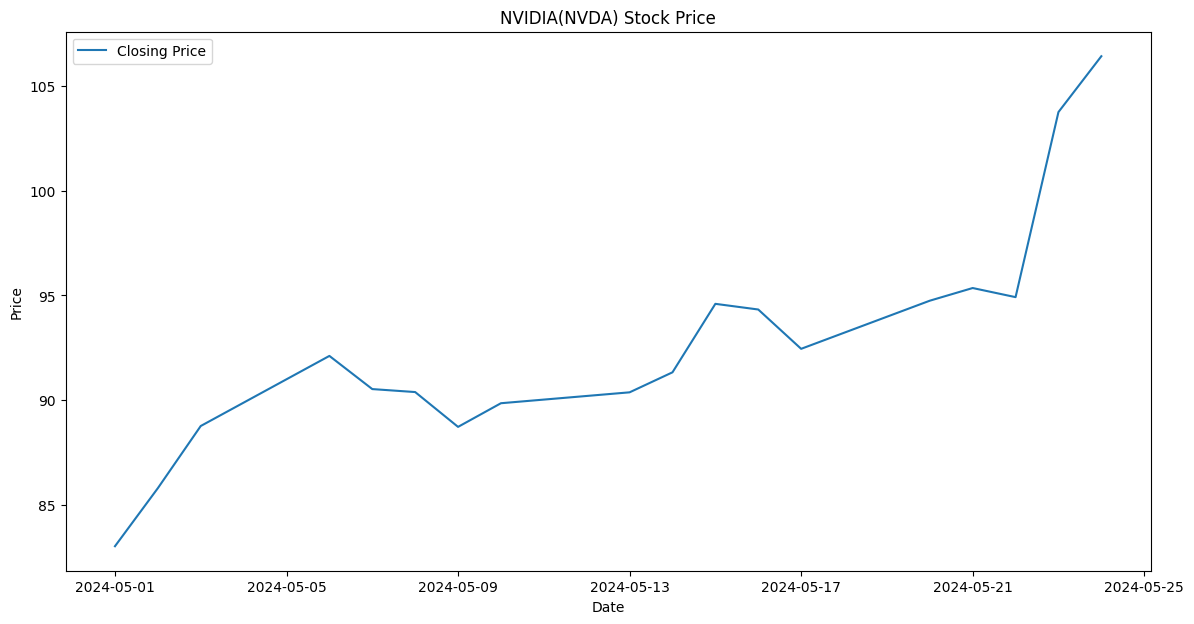

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [8]:
df.head()

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.013718,85.971745,81.228301,85.049052,559863000
2024-05-02,85.788811,86.208671,83.172666,84.421256,377898000
2024-05-03,88.759834,89.251669,87.011408,87.760163,398341000
2024-05-06,92.109726,92.189701,89.025740,89.360629,376203000
2024-05-07,90.524246,91.750840,88.981754,91.068066,437342000


In [9]:
from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.01371765136719,85.9717451202874,81.22830132116862,85.04905184528752,559863000
2024-05-02,85.78881072998047,86.20867093085921,83.17266601309362,84.42125626969049,377898000
2024-05-03,88.75983428955078,89.25166943381491,87.01140828668458,87.76016278941914,398341000
2024-05-06,92.10972595214844,92.18970149787158,89.02574047227303,89.36062948973989,376203000
2024-05-07,90.52424621582031,91.75084041902228,88.98175395384375,91.06806618454974,437342000
2024-05-08,90.38230895996094,91.16404981267715,89.39063036492911,89.45361321300157,325721000
2024-05-09,88.71784973144531,91.04208295679378,88.20202038816478,90.4992620554592,378013000
2024-05-10,89.84848022460938,91.37098265790202,89.19769305265027,90.27534193987526,335325000
2024-05-13,90.36930847167969,90.96811074029578,88.49991996993283,90.44827727503778,289680000
2024-05-14,91.32599639892578,91.62089767401247,88.90478722070216,89.56956971282393,296507000
2024-05-15

In [10]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

엔비디아(NVDA)의 2024년 5월 주가 데이터를 분석한 결과는 다음과 같습니다.

### 1. 주가 동향
- **시작가**: 2024년 5월 1일의 종가는 약 83.01달러로 시작했습니다.
- **최고가**: 5월 23일에 103.76달러로 최고가를 기록했습니다.
- **최저가**: 5월 1일에 81.23달러로 최저가를 기록했습니다.
- **종가**: 5월 24일의 종가는 106.43달러로 마감했습니다.

### 2. 가격 변화
- **5월 1일 ~ 5월 24일**: 주가는 83.01달러에서 106.43달러로 상승하여, 약 28.2% 상승했습니다.
- **주간 변동성**: 주가는 전반적으로 상승세를 보였으며, 특히 5월 23일에 급격한 상승이 있었습니다.

### 3. 거래량
- **거래량**: 5월 23일에는 835,065,000주로 가장 높은 거래량을 기록했습니다. 이는 주가 상승과 관련이 있을 수 있습니다.
- **거래량 변화**: 거래량은 5월 초반에 비해 중반 이후에 증가하는 경향을 보였습니다.

### 4. 주요 일자
- **5월 15일**: 94.60달러로 종가가 상승하며, 주가가 90달러를 넘어섰습니다.
- **5월 23일**: 주가가 100달러를 돌파하며, 큰 상승폭을 기록했습니다.

### 5. 결론
엔비디아의 2024년 5월 주가는 전반적으로 강한 상승세를 보였으며, 특히 중순 이후 급격한 상승이 있었습니다. 거래량 또한 증가하며 투자자들의 관심이 높아진 것으로 보입니다. 이러한 추세는 향후 주가에 긍정적인 영향을 미칠 가능성이 있습니다. 

이 데이터는 향후 투자 결정을 위한 참고자료로 활용될 수 있습니다.
